This is the 1st exploratory attempt. I will not do much preprocessing and use sklearn ml models' default parameters just to see how they perform.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import dill

In [3]:
data = pd.read_csv('heart_2020_cleaned.csv')

In [4]:
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
6,No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
7,No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
8,No,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No
9,No,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
data.isnull().values.any()

False

no missing values, great!

In [8]:
print(
    data.describe(),
    '\nmedian BMI: ', data.BMI.median(),
)

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000 
median BMI:  27.34


According to [CDC](https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%2018.5,falls%20within%20the%20obese%20range.): "If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range. So both the mean and median BMI values of the samples are slightly above the healthy weight range."

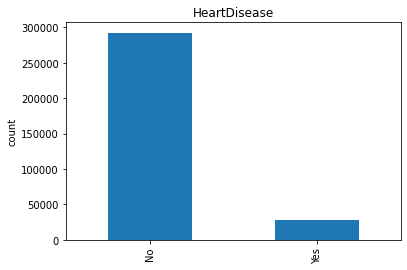

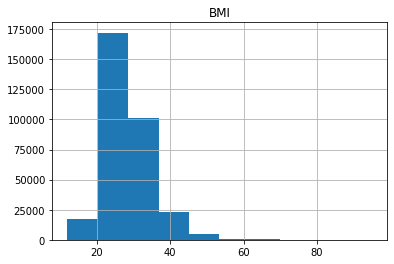

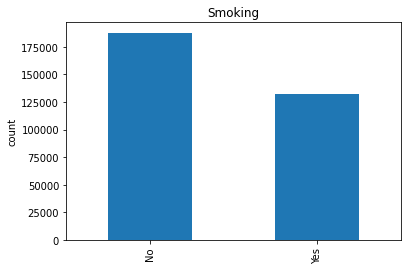

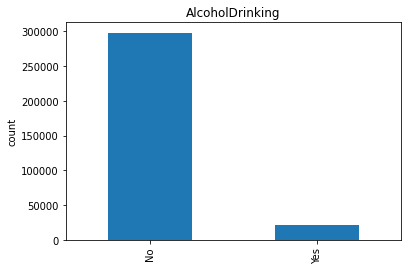

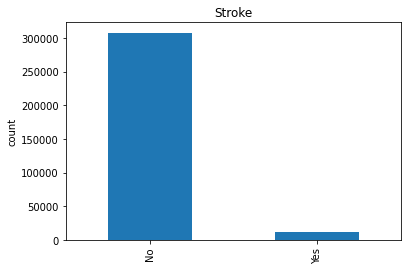

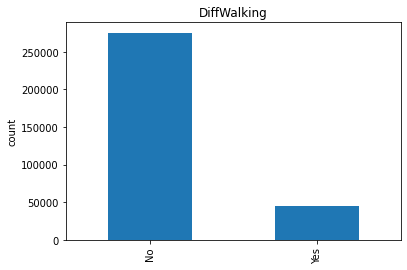

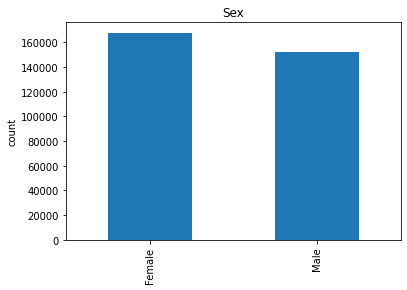

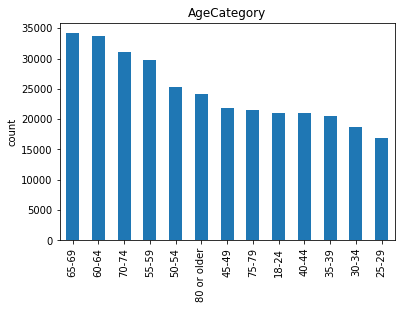

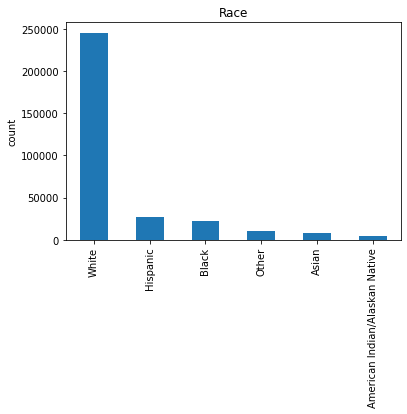

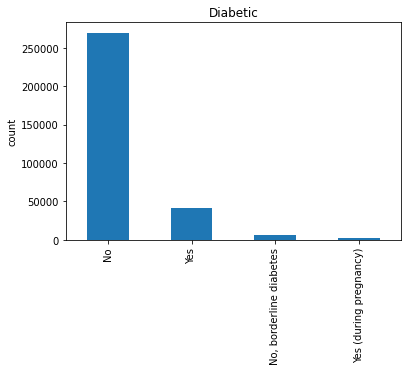

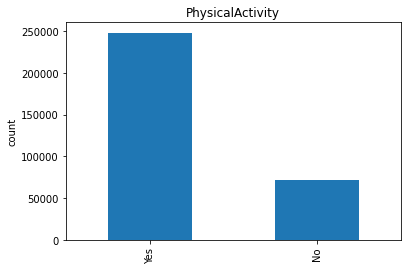

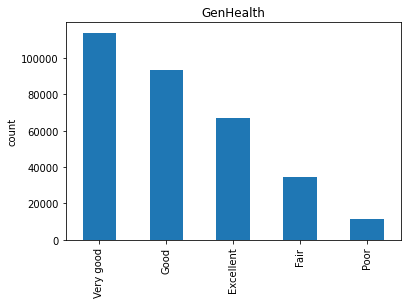

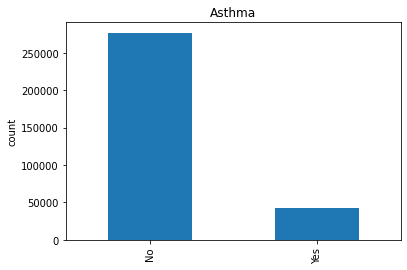

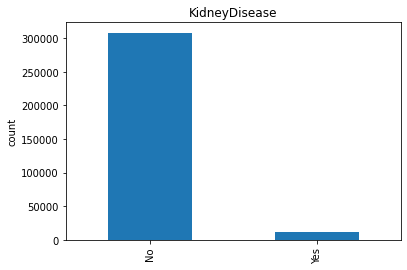

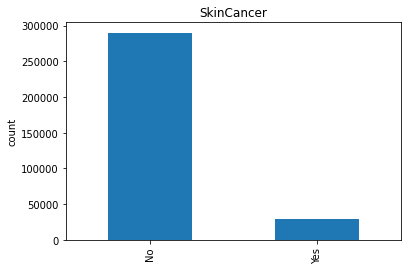

In [9]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.ylabel('count')
        plt.show()
    elif data[col].dtype == 'float64':
        data[col].hist()
        plt.title(col)
        plt.show()

By examining each bar graph above, it doesn't seem to be any outliers in the data.

<AxesSubplot:ylabel='HeartDisease'>

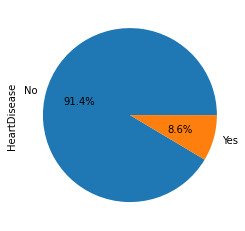

In [7]:
data.HeartDisease.value_counts().plot(kind='pie', autopct='%1.1f%%')

* Most categorical columns have binary values, but there are some with more than 2 values
* "Race" column is unbalanced as "Asian" and "American Indian" are under represented
* Most people reported to have 0 days of feeling not good physically and mentally -> most people are healthy
* The 2nd most frequent group is 30. Which means the people that have days of feeling bad physically or mentally tend to feel bad most of the time. This makes sense with illnesses such as depression and chronic diseases. And day values between 2 and 29 are underrepresented
* The "YES" value in columns with "YES" and "NO" values are usually underrepresented
* The target column "HeartDisease" is also unbalanced. We can try upscaling/down scaling the target column to see if we can improve the model

In [5]:
# one-hot encoding
category_cols = [col for col in data.columns if data[col].dtype == 'object']
data = pd.get_dummies(data=data, columns=category_cols, drop_first=True)

In [6]:
# create test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('HeartDisease_Yes', axis=1), data['HeartDisease_Yes'], test_size=0.2, random_state=42)


In [13]:
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
print(corr_matrix.HeartDisease_Yes.sort_values(ascending=False))

HeartDisease_Yes                    1.000000
DiffWalking_Yes                     0.202147
Stroke_Yes                          0.194949
Diabetic_Yes                        0.184924
GenHealth_Poor                      0.175794
PhysicalHealth                      0.171283
GenHealth_Fair                      0.149501
KidneyDisease_Yes                   0.145840
AgeCategory_80 or older             0.142571
Smoking_Yes                         0.107845
AgeCategory_75-79                   0.098846
SkinCancer_Yes                      0.093149
AgeCategory_70-74                   0.081928
Sex_Male                            0.072051
BMI                                 0.052843
AgeCategory_65-69                   0.043239
Asthma_Yes                          0.040402
Race_White                          0.039896
GenHealth_Good                      0.037626
MentalHealth                        0.027226
Diabetic_No, borderline diabetes    0.017032
AgeCategory_60-64                   0.015977
SleepTime 

In [7]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

Now let's fit the training set on various models.

In [17]:
from sklearn.model_selection import cross_validate

def cross_validate_same_data_diff_model(models, X, y, cv=3, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']):
    scores_lst = []
    for model in models:
        scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
        scores_lst.append({k: round(v.mean(), 2) for k, v in scores.items()})
        print(f'Finished cross-validation for {model.__class__.__name__}')
    return pd.DataFrame(scores_lst, index=[model.__class__.__name__ for model in models])

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

models = [
    LogisticRegression(random_state=42),
    LinearSVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    xgb.XGBClassifier(random_state=42),
]

score_table = cross_validate_same_data_diff_model(models, X_train, y_train)
print(score_table)

Finished cross-validation for LogisticRegression


C:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Finished cross-validation for LinearSVC
Finished cross-validation for DecisionTreeClassifier
Finished cross-validation for RandomForestClassifier
Finished cross-validation for AdaBoostClassifier
Finished cross-validation for GradientBoostingClassifier
Finished cross-validation for XGBClassifier
                            fit_time  score_time  test_accuracy  \
LogisticRegression              1.96        0.12           0.92   
LinearSVC                      74.72        0.14           0.92   
DecisionTreeClassifier          2.68        0.21           0.86   
RandomForestClassifier         27.37        4.96           0.91   
AdaBoostClassifier             10.80        1.90           0.92   
GradientBoostingClassifier     45.05        0.38           0.92   
XGBClassifier                   8.65        0.34           0.92   

                            train_accuracy  test_precision  train_precision  \
LogisticRegression                    0.92            0.55             0.55   
LinearSVC

* Logistic Regression has very low precision and recall for predicting "YES" values, which are the target of interest.
* Similarly, Linear SVM mis-classifies almost all the "YES" values. Perhaps the data is not linearly separable.
* SVM will likely take really long to train. So it is trained separately below using a subset of the training set.
* Decision tree, random forest, and gradient boosting all perform similarly poor.

In [22]:
from sklearn.svm import SVC

# since only support vectors matter to SVM and we have too many samples, 
# let's use 10% of training data just to see the performance.

X_train_10pct = X_train[:int(X_train.shape[0] * 0.1)]
y_train_10pct = y_train[:int(y_train.shape[0] * 0.1)]
svm_svc = SVC(degree=3)
score_table = pd.concat([score_table, cross_validate_same_data_diff_model([svm_svc], X_train_10pct, y_train_10pct)])
print(score_table)

Finished cross-validation for SVC
                            fit_time  score_time  test_accuracy  \
LogisticRegression              1.96        0.12           0.92   
LinearSVC                      74.72        0.14           0.92   
DecisionTreeClassifier          2.68        0.21           0.86   
RandomForestClassifier         27.37        4.96           0.91   
AdaBoostClassifier             10.80        1.90           0.92   
GradientBoostingClassifier     45.05        0.38           0.92   
XGBClassifier                   8.65        0.34           0.92   
SVC                            17.70       20.77           0.92   

                            train_accuracy  test_precision  train_precision  \
LogisticRegression                    0.92            0.55             0.55   
LinearSVC                             0.92            0.60             0.61   
DecisionTreeClassifier                1.00            0.23             1.00   
RandomForestClassifier                1.00    

The column that I am interested in the most is "test_recall". And even the highest recall (DecisionTreeClassifier) is only 0.25
Unfortunately, the polynomial kernel SVM model, like the others, is still not looking good for predicting "YES" values.
From the initial analysis, we can see that some preprocessing steps are required else most models will perform poorly.
The analysis of this exploration is summarized in the beginning of the 2nd exploration.

In [30]:
# save all the models and results
dill.dump_session('exploration_1.db')